In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chennai-water-management/chennai_reservoir_levels.csv
/kaggle/input/chennai-water-management/chennai_reservoir_rainfall.csv


<h3><font color="blue">In the following notebook, we will talk about the Chennai water situation and examine statistics from 2004 to 2020. For our visualisations, we primarily employed line plots. We will begin by displaying total water and rainfall levels before inspecting each reservior offered. </font></h2>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

<h1>Information in General Regarding The Problem</h1>
<h7>In Chennai City, Chennai Municipal Corporation was responsible for
construction, operation and maintenance of water supply system till August 1978. It
was transferred to the (then newly formed) CMWSSB with all assets and liabilities. The
major supply sources viz. Poondi reservoir, Cholavaram lake and Redhills lake are
under the control of the State PWD (Irrigation); further the PWD (Ground Water Cell) is
responsible for the investigation of ground water resources within CMA to augment
supplies.</h7><br><br>
<h7>Chennai City water supply is drawn from the Red hills lake located about six
km. from City in the northwest along the GNT Road. This lake mainly receives its
supply from the Kosasthalaiyar River across which a dam was constructed to create
reservoir at Poondi. The anicut constructed in its downstream at Tamaraipakkam
diverts the flow through the upper supply channel to Cholavaram Lake; from there it
flows to Redhills Lake. A separate lined channel from Poondi reservoir connects the
upper supply channel which prevents any possible loss of transmission through dry
beds of the river. The flow into these sources is seasonal.A number of small lakes are also connected in the northwest of CMA to the
Redhills Lake and the run-off in the catchment areas of these lakes are fed to the
Redhills Lake</h7><br><h11>reference [Click hear](https://www.cmdachennai.gov.in/Volume3_English_PDF/Vol3_Chapter07_Infrasructure.pdf)<br><br>

<h3>Image from GOATS AND SODA; No Drips, No Drops: A City Of 10 Million Is Running Out Of Water</h3>

![Water Depletion In Chennai](https://media.npr.org/assets/img/2019/06/25/ap_19171124792533-copy_custom-19413d1a3dd25470d6686049f380d33dafe0da77.jpg)

In [3]:
water_level = pd.read_csv('/kaggle/input/chennai-water-management/chennai_reservoir_levels.csv')
rainfall_level = pd.read_csv('/kaggle/input/chennai-water-management/chennai_reservoir_rainfall.csv')

In [4]:
def data_info(data, name):
    print('Information for the dataset', name , 'includes first 7 and last 7 records and a statistical summary\n\n')
    print(data.head(7))
    print('---------------------------------------------------------------------------------------------------')
    print(data.tail(7))
    print('---------------------------------------------------------------------------------------------------')
    print(data.describe())
    print('\n\n\n')

data_info(water_level, 'Chennai Reservoir Levels')
data_info(rainfall_level, 'Chennai Reservoir Rainfall')

Information for the dataset Chennai Reservoir Levels includes first 7 and last 7 records and a statistical summary


         Date  POONDI  CHOLAVARAM  REDHILLS  CHEMBARAMBAKKAM
0  01-01-2004     3.9         0.0     268.0              0.0
1  02-01-2004     3.9         0.0     268.0              0.0
2  03-01-2004     3.9         0.0     267.0              0.0
3  04-01-2004     3.9         0.0     267.0              0.0
4  05-01-2004     3.8         0.0     267.0              0.0
5  06-01-2004     3.8         0.0     266.0              0.0
6  07-01-2004     3.8         0.0     266.0              0.0
---------------------------------------------------------------------------------------------------
            Date  POONDI  CHOLAVARAM  REDHILLS  CHEMBARAMBAKKAM
6175  27-11-2020  2214.0       310.0    2790.0           3176.0
6176  28-11-2020  2742.0       361.0    2815.0           3151.0
6177  29-11-2020  2814.0       403.0    2819.0           3120.0
6178  30-11-2020  2848.0       465.0   

<h3>Note</h3> <br>
For the above dataset, unit is million cubic feet. Starting point of both the dataset is **01-01-2004** and after 6182 days the record ends on **03-12-2020**. Presented data is clean, organized and complete. We can start our exploratory data analysis directly. 

In [5]:
water_level['Date'] = pd.to_datetime(water_level['Date'], dayfirst=True)
water_level['Total']= water_level.iloc[:, -4:-1].sum(axis=1)
water_level['Month'] = water_level['Date'].dt.month
water_level['Year'] = water_level['Date'].dt.year
print('We added two extra columns \n\n')
water_level.tail()

We added two extra columns 




,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Total,Month,Year
6177,2020-11-29,2814.0,403.0,2819.0,3120.0,6036.0,11,2020
6178,2020-11-30,2848.0,465.0,2833.0,3120.0,6146.0,11,2020
6179,2020-12-01,2902.0,504.0,2841.0,3123.0,6247.0,12,2020
6180,2020-12-02,2873.0,547.0,2847.0,3125.0,6267.0,12,2020
6181,2020-12-03,2867.0,590.0,2878.0,3137.0,6335.0,12,2020


In [6]:
rainfall_level['Total']= rainfall_level.iloc[:, -4:-1].sum(axis=1)
rainfall_level['Date'] = pd.to_datetime(rainfall_level['Date'], dayfirst=True)
rainfall_level['Month'] = rainfall_level['Date'].dt.month
rainfall_level['Year'] = rainfall_level['Date'].dt.year
print('We added three extra columns\n\n')
rainfall_level.tail()

We added three extra columns




,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Total,Month,Year
6177,2020-11-29,0.0,0.0,0.0,0.0,0.0,11,2020
6178,2020-11-30,4.0,13.0,6.0,0.0,23.0,11,2020
6179,2020-12-01,0.0,0.0,0.0,0.0,0.0,12,2020
6180,2020-12-02,0.0,0.0,0.0,0.0,0.0,12,2020
6181,2020-12-03,44.0,24.0,23.0,26.0,91.0,12,2020


In [7]:
def plot_total(reservior, data, data1):
    sns.set(rc={'figure.figsize':(11,5)})
    print('Water Level for our reservior:', reservior)
    sns.lineplot(x="Date", y= reservior,label="Date wise distribution", data=data)
    plt.show()
    sns.lineplot(x="Year", y= reservior,label="Year wise distribution",  data=data)
    plt.show()
    sns.lineplot(x="Month", y= reservior,label="Month wise distribution",  data=data)
    plt.show()

    print('\n\n\n\n\n\n\n\n\n')
    print('Rainfall Level for our reservior:', reservior)
    sns.lineplot(x="Date", y= reservior,label="Date wise distribution",color='green', data=data1)
    plt.show()
    sns.lineplot(x="Year", y= reservior,label="Year wise distribution",color='green', data=data1)
    plt.show()
    sns.lineplot(x="Month", y= reservior,label="Month wise distribution",color='green', data=data1)
    plt.show()
    
def plots(reservior, data, data1):
    sns.set(rc={'figure.figsize':(11,5)})
    print('Water Level for our reservior:', reservior)
    sns.lineplot(x="Date", y= reservior,label="Date wise distribution", data=data)
    plt.show()
    sns.lineplot(x="Year", y= reservior,label="Year wise distribution",  data=data)
    plt.show()
    sns.lineplot(x="Month", y= reservior,label="Month wise distribution",  data=data)
    plt.show()

def year_wise(reservior, data, data1):
    sns.set(rc={'figure.figsize':(11,5)})
    print('Water Level for our reservior:', reservior)
    sns.lineplot(x="Date", y= reservior,label="Date wise distribution", data=data)
    plt.show()
    sns.lineplot(x="Month", y= reservior,label="Month wise distribution",  data=data)
    plt.show()

    print('\n\n\n\n\n\n\n\n\n')
    print('Rainfall Level for our reservior:', reservior)
    sns.lineplot(x="Date", y= reservior,label="Date wise distribution",color='green', data=data1)
    plt.show()
    sns.lineplot(x="Month", y= reservior,label="Month wise distribution",color='green', data=data1)
    plt.show()

Water Level for our reservior: Total


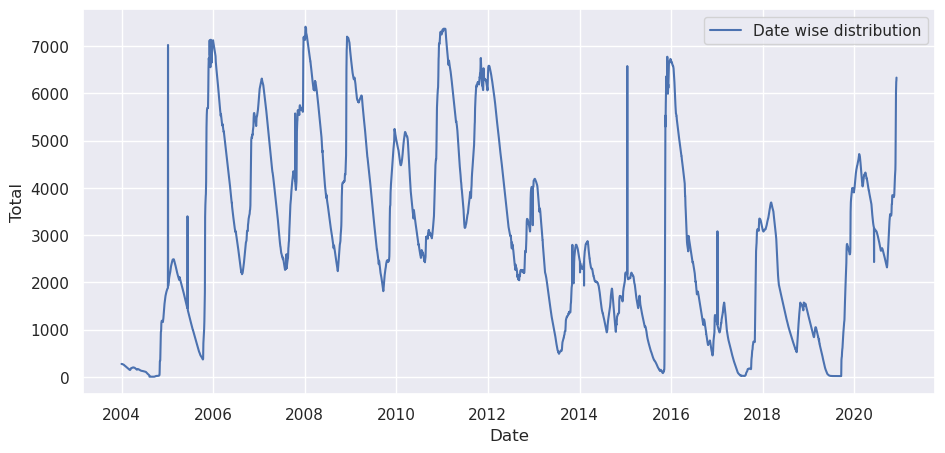

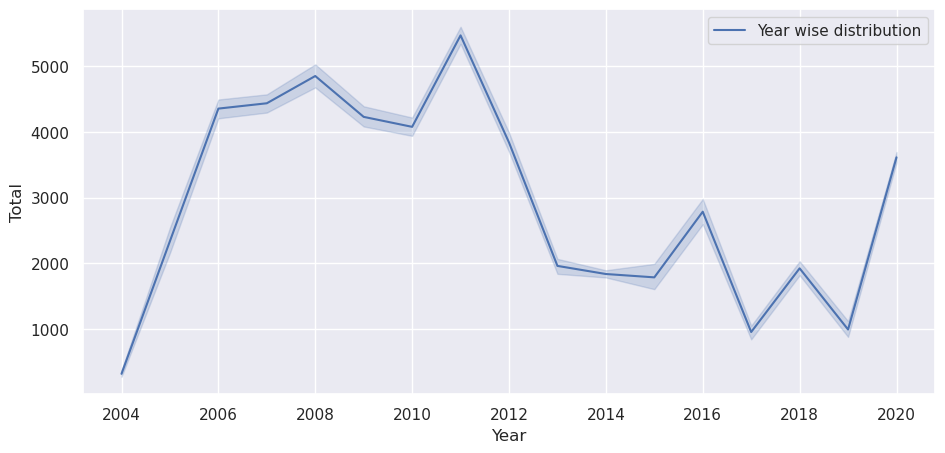

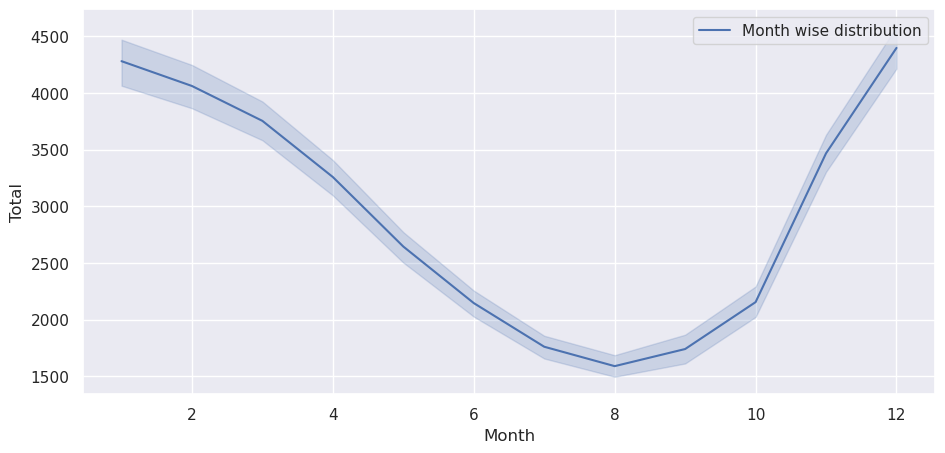











Rainfall Level for our reservior: Total


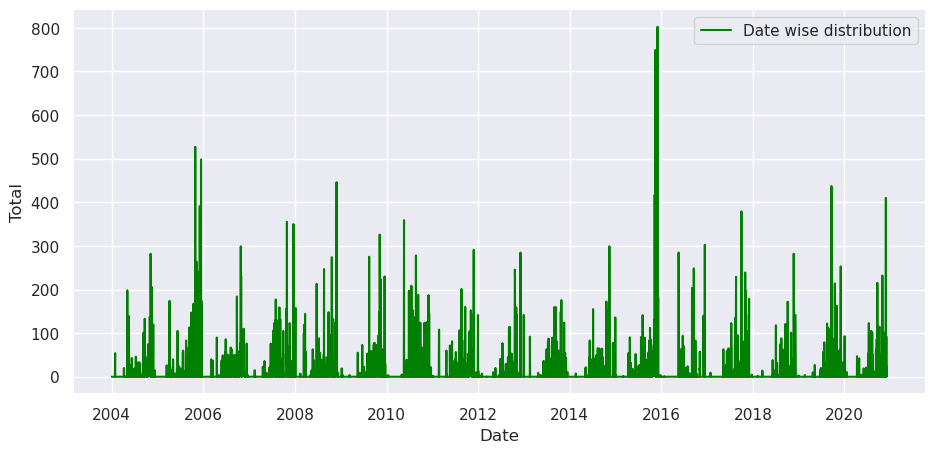

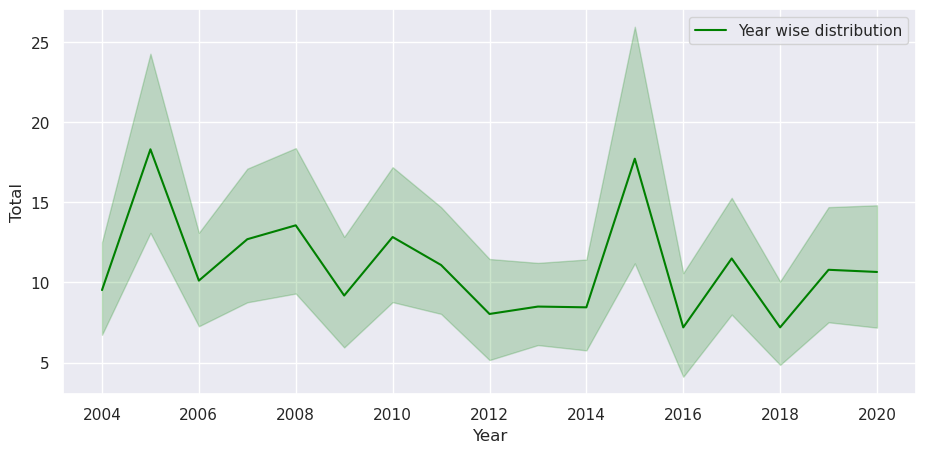

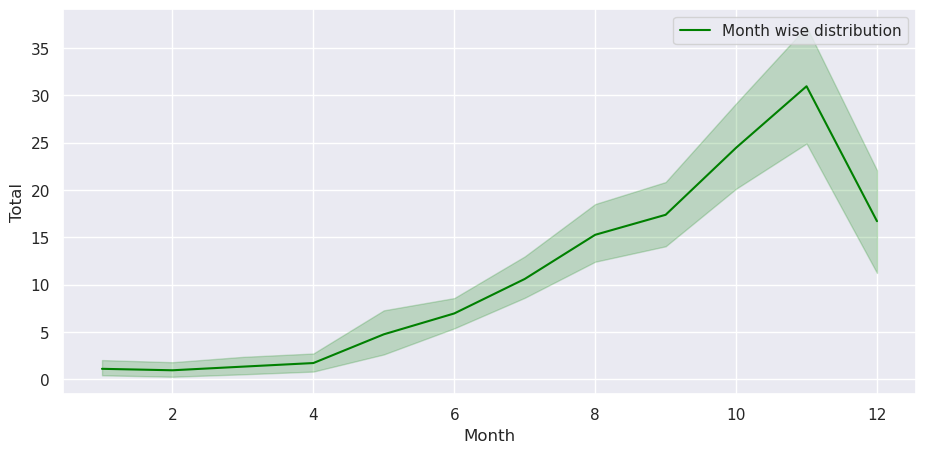

In [8]:
plot_total("Total", water_level, rainfall_level)

<h2>Anyone can see that there is a strong relationship between rainfall distribution and available water level in reservoirs.</h2>

<h7>Image from weather-and-climate.com</h7><br>
![](https://weather-and-climate.com/uploads/average-rainfall-india-chennai.png)
<br>
<h4> The above graph is approximately similar to the monthly distribution of total rainfall we have represented. We can notice how rainfall starts around June and reaches it's max during November.</h4>
<br>


    

Water Level for our reservior: POONDI


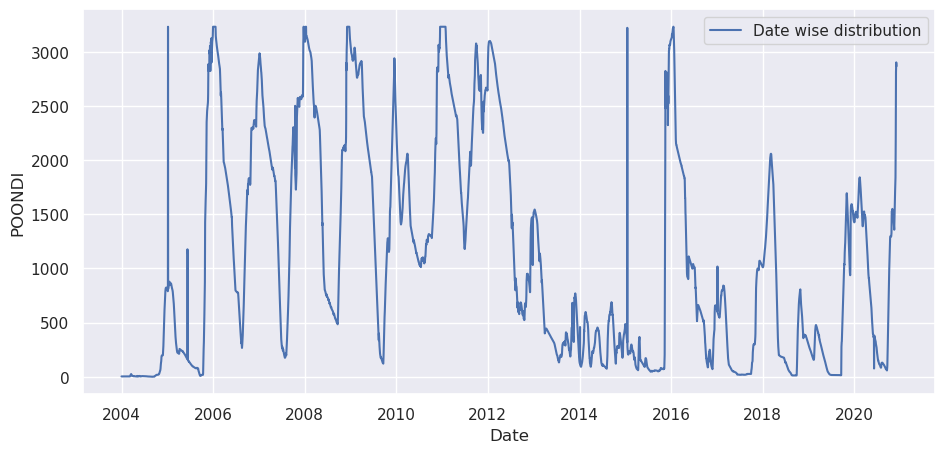

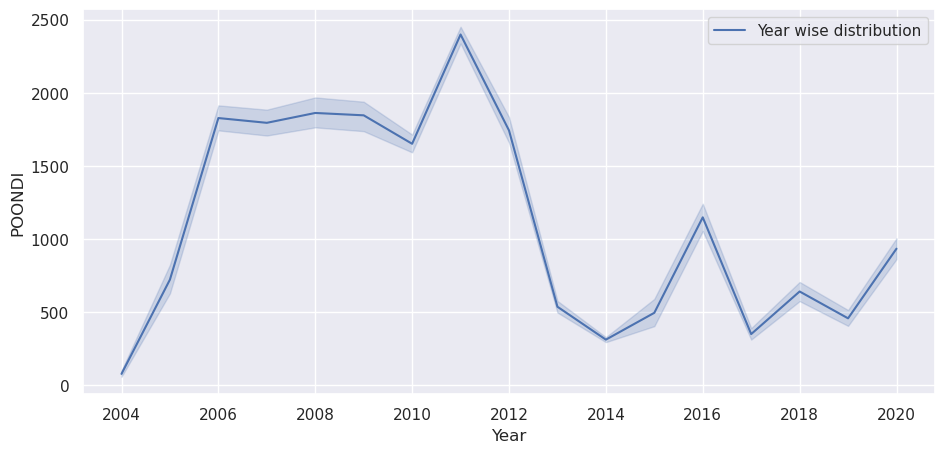

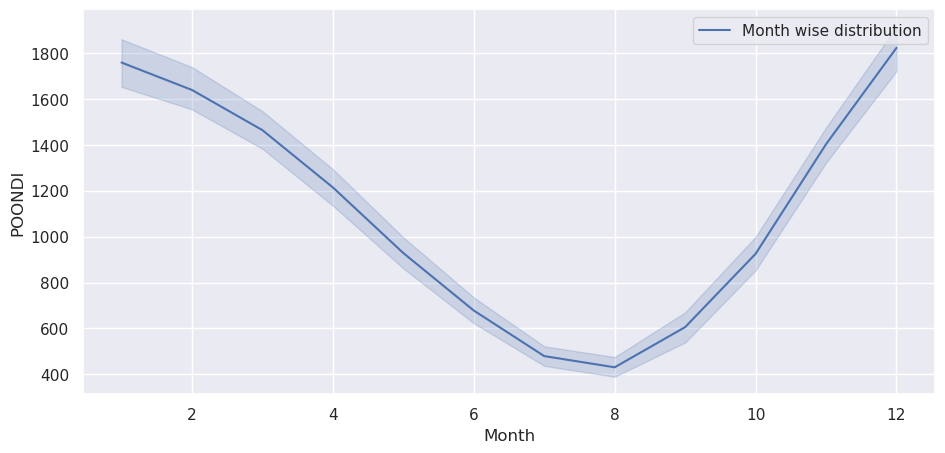

In [9]:
plots("POONDI", water_level, rainfall_level)

Water Level for our reservior: CHOLAVARAM


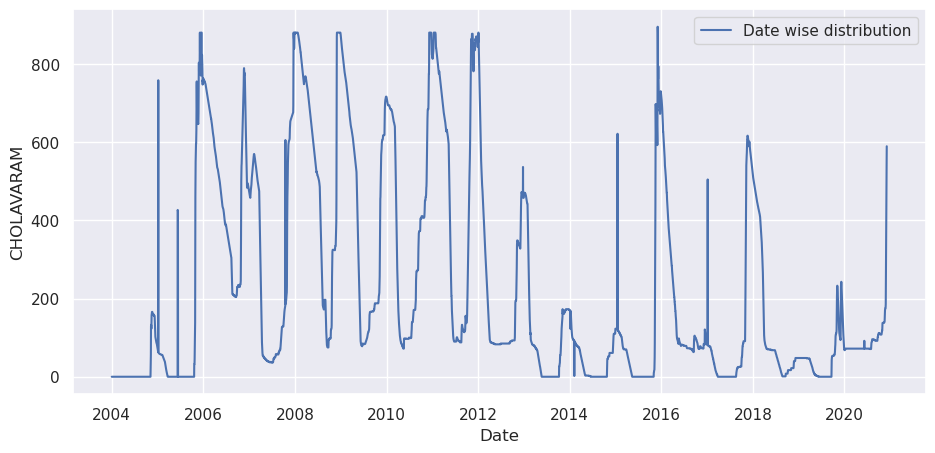

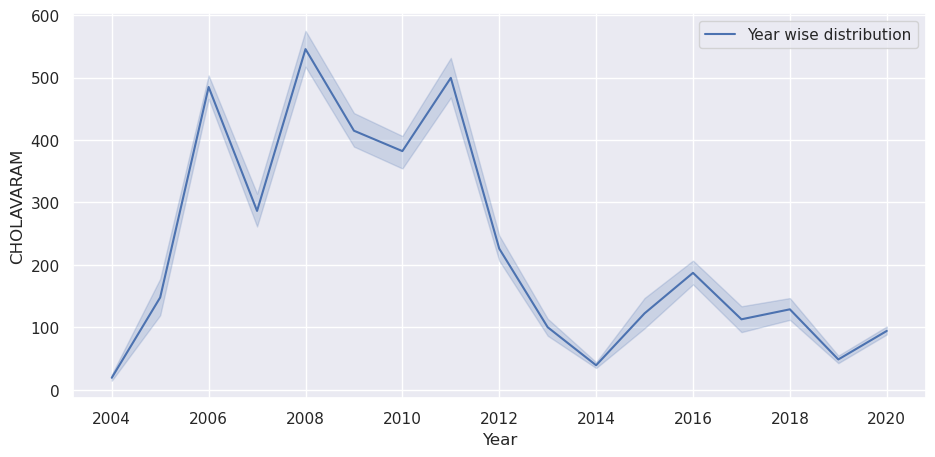

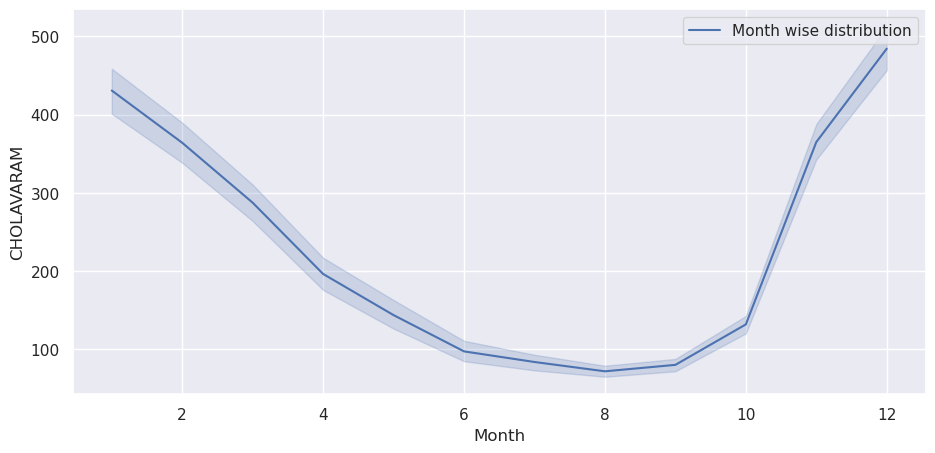

In [10]:
plots("CHOLAVARAM", water_level, rainfall_level)

Water Level for our reservior: REDHILLS


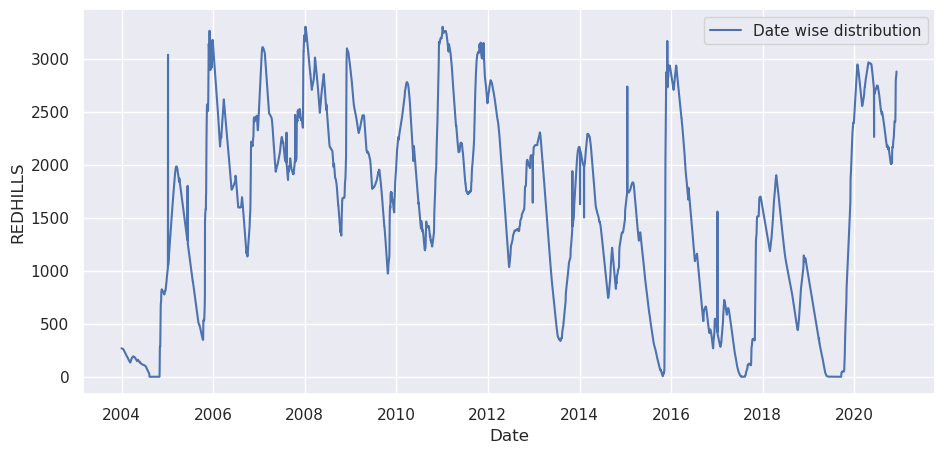

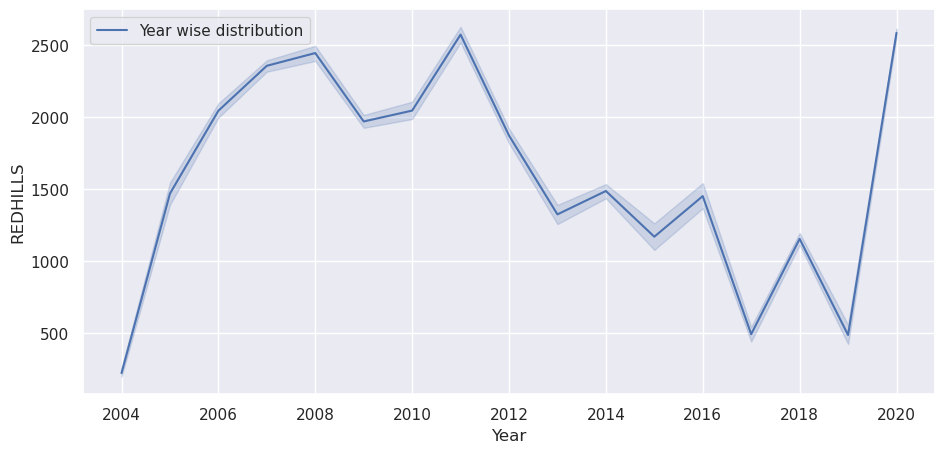

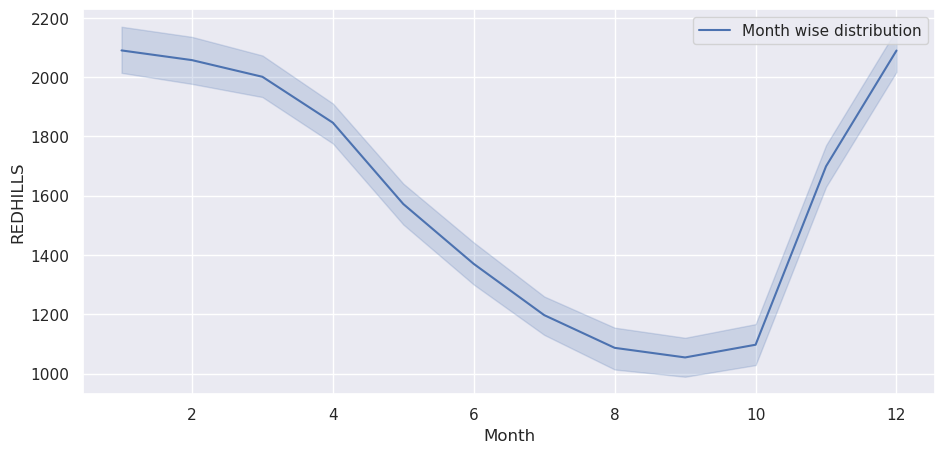

In [11]:
plots("REDHILLS", water_level, rainfall_level)

Water Level for our reservior: CHEMBARAMBAKKAM


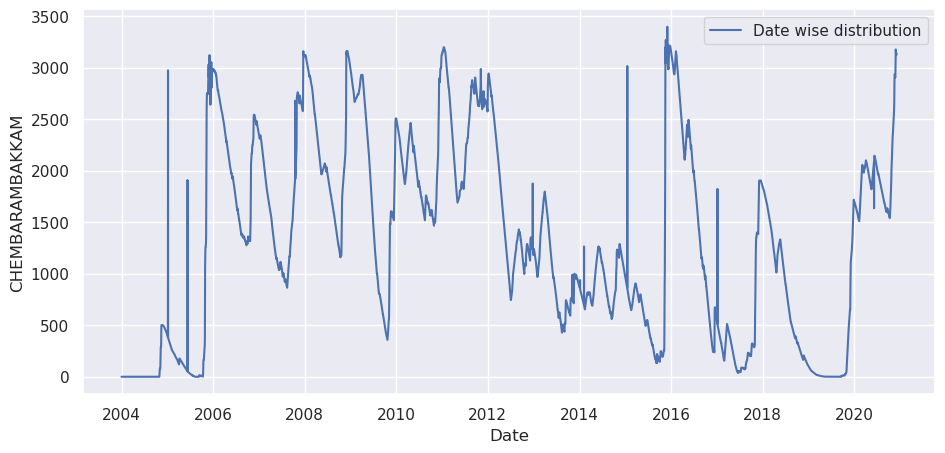

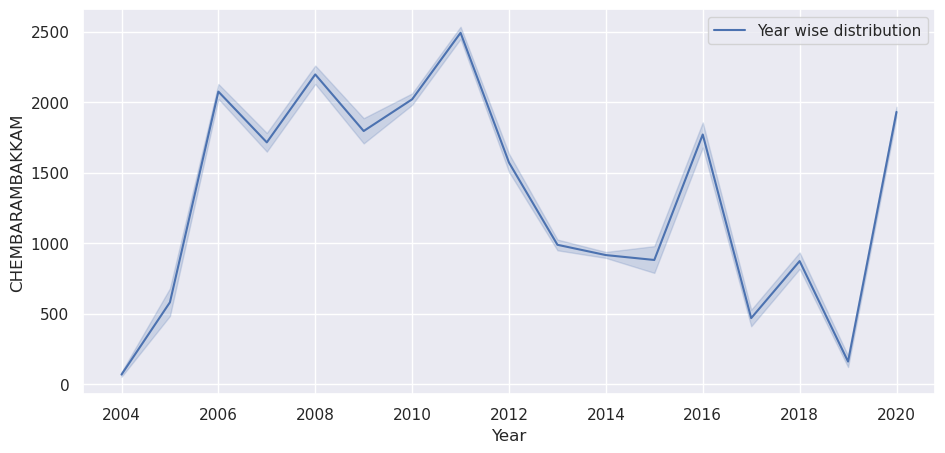

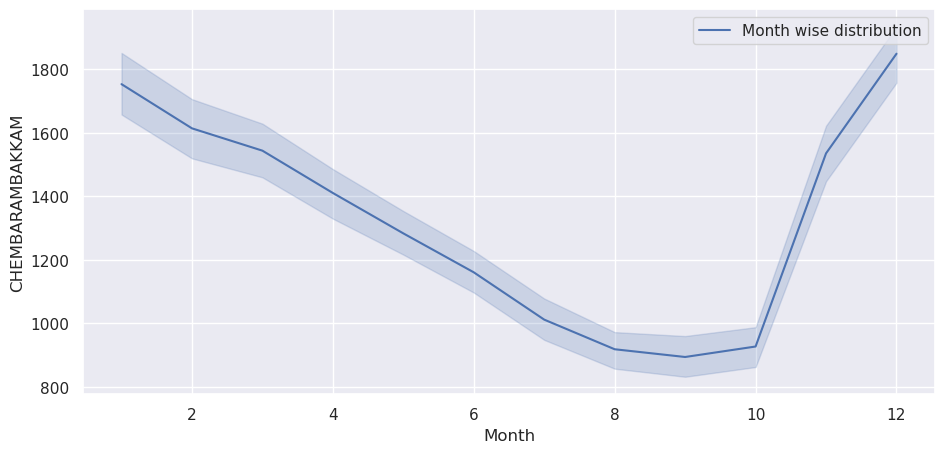

In [12]:
plots("CHEMBARAMBAKKAM", water_level, rainfall_level)

<h3><font color="green">On 19 June 2019, Chennai city officials declared that "Day Zero", or the day when almost no water is left, had been reached, as all the four main reservoirs supplying water to the city had run dry.</font></h3>

In [13]:
W_Year_2019 = water_level.loc[water_level['Year']==2019]
R_Year_2019 = rainfall_level.loc[rainfall_level['Year']==2019]

Water Level for our reservior: Total


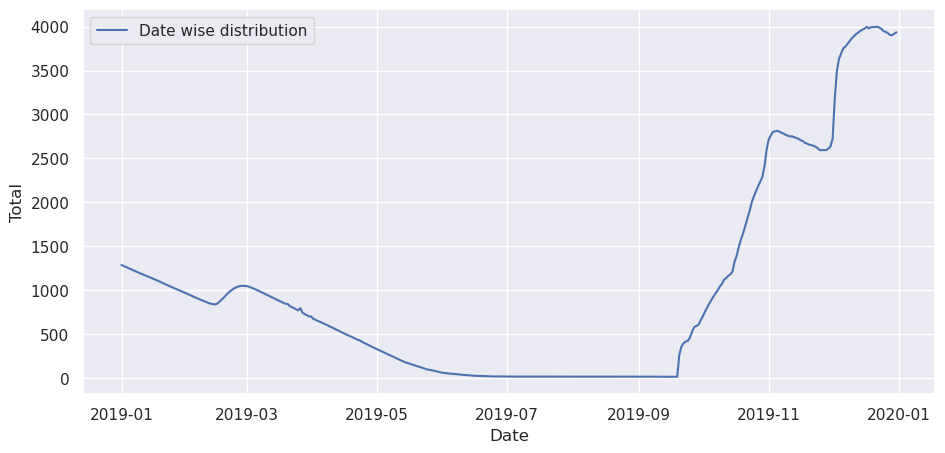

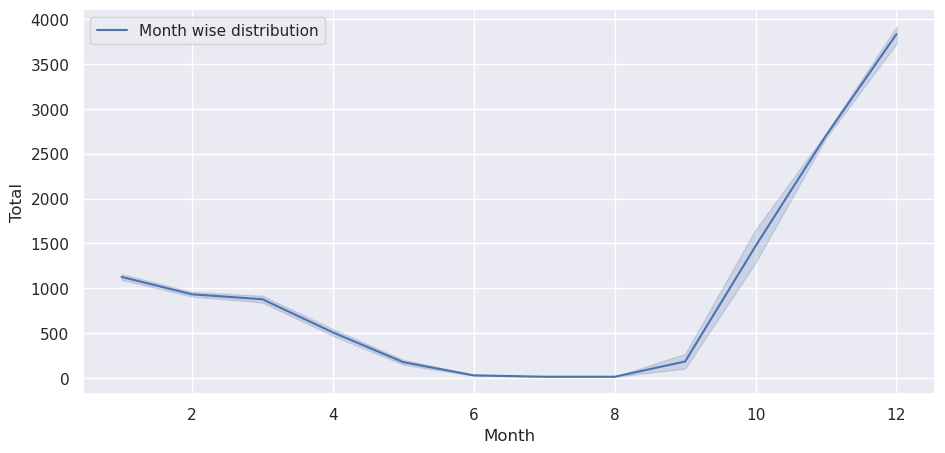











Rainfall Level for our reservior: Total


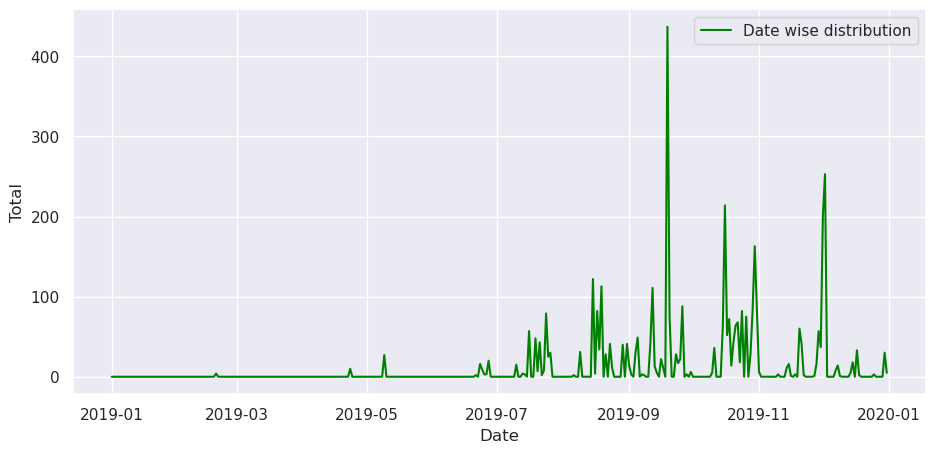

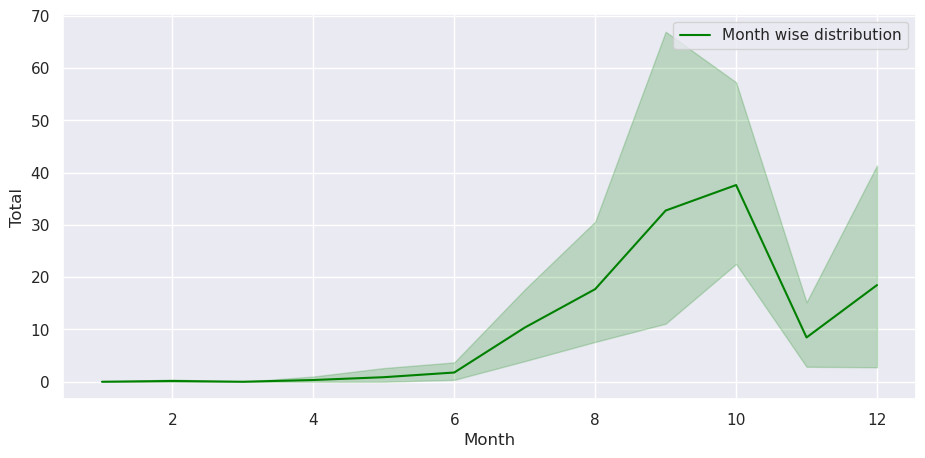

In [14]:
#If you want to see detailed plotting for the year 2019, expand the output below.
year_wise("Total", W_Year_2019, R_Year_2019)